Der Datensatz wird importiert und Statistiken werden ausgegeben.

[nltk_data] Downloading package punkt to /Users/timo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/timo/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Overall data points: 7122
neutral     3022
negative    2087
positive    2013
Name: Polarity, dtype: int64


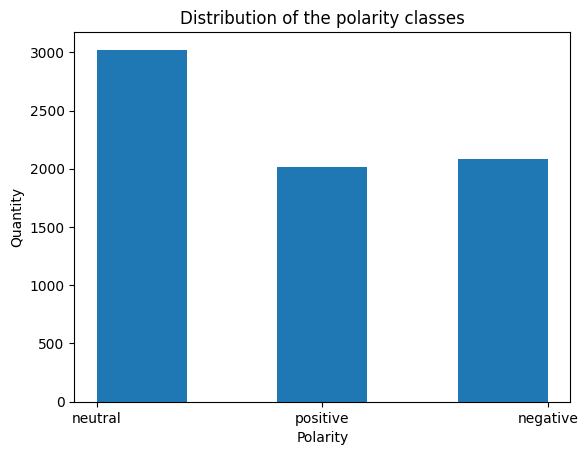

In [39]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
nltk.download('wordnet')

fpath = os.path.abspath('')
fpath = os.path.abspath(os.path.join(fpath, '..'))
pd.set_option('display.max_rows', None)

data = pd.read_csv(os.path.join(fpath, 'data/github_gold.csv'), delimiter=';')

print('Overall data points: ' + str(data.shape[0]))
print(data.Polarity.value_counts())

# Balkendiagramm
ax = plt.axes()
ax.hist(data.Polarity, bins=5)

ax.set(xlabel='Polarity', 
       ylabel='Quantity',
       title='Distribution of the polarity classes')

data.Text.describe()
data.Text

enc_data = data

In [40]:
enc_data.Text = enc_data.Text.str.lower()                   # to lower case
enc_data.Text = enc_data.Text.str.replace('[^\w\s]', '')    # remove special characters
enc_data.Text = enc_data.Text.str.split(' ')                # Create a list with tokens

for i, row in enumerate(enc_data.Text):
    # Remove empty strings
    enc_data.Text[i] = list(filter(lambda x: len(x) > 0, enc_data.Text[i]))

enc_data.Text.describe()
print(enc_data.Text)

pol_map = {'positive': 1,
           'neutral': 0,
           'negative': -1}
data.Polarity = data.Polarity.map(pol_map)

/var/folders/l4/49sqz_0968dgz95nxsm709yw0000gn/T/ipykernel_7213/3809754380.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  enc_data.Text = enc_data.Text.str.replace('[^\w\s]', '')    # remove special characters
/var/folders/l4/49sqz_0968dgz95nxsm709yw0000gn/T/ipykernel_7213/3809754380.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enc_data.Text[i] = list(filter(lambda x: len(x) > 0, enc_data.Text[i]))


0       [no, i, still, see, the, wrong, twins, httpsgi...
1                                              [reverted]
2       [you, can, leave, a, queue, while, in, queue, ...
3          [didnt, look, at, spelltargetrestrictions, xd]
4       [not, sure, about, what, kind, of, line, lengt...
5       [normanmaurer, nice, catch, did, you, make, th...
6       [thats, why, i, didnt, close, after, sending, ...
7       [build, result, for, 78d8f05c218cab107255c4dc1...
8       [why, you, think, using, immediateeventexecuto...
9       [these, are, the, ones, we, currently, hardcod...
10      [php, notice, use, of, undefined, constant, re...
11      [because, i, thought, i, didnt, need, the, quo...
12      [gibson042, youre, not, gonna, believe, this, ...
13      [yeah, i, agree, that, makes, more, sense, i, ...
14                                           [very, deep]
15      [we, can, only, compare, our, results, to, jso...
16      [i, dont, agree, with, ambal, the, name, of, v...
17      [edit,

In [42]:
features = []

for sentence in enc_data.Text.Text:
    words = sentence.split(' ')

    for word in words:
        if word != '' and not word in features:
            features.append(word)

# Links könnten besser gesplittet werden. Derzeit ist die Gesamte URL ein String, ohne Sonderzeichen, ein token
# Man könnte aber auch zB http als einzelnes Token verwenden
features.sort()
features = pd.Series(features)
features.describe()

AttributeError: 'Series' object has no attribute 'Text'

In [44]:
enc_data.drop(labels='ID', axis=1, inplace=True)
enc_data.head(n=100)

(7122, 2)

In [48]:
enc_data.value_counts

<bound method DataFrame.value_counts of       Polarity                                               Text
0            0  no i still see the wrong twins   httpsgithubco...
1            0                                           reverted
2            0  you can leave a queue while in queue  before n...
3            1           didnt look at spelltargetrestrictions xd
4            0  not sure about what kind of line lengths the p...
5            1  normanmaurer nice catch  did you make the same...
6            0  thats why i didnt close after sending the clos...
7            0  build result for 78d8f05c218cab107255c4dc1a134...
8            0  why you think using immediateeventexecutor is ...
9            0  these are the ones we currently hardcode in te...
10           0   php notice  use of undefined constant response  
11           0  because i thought i didnt need the quotes whic...
12          -1  gibson042 youre not gonna believe this but  ht...
13           0  yeah i agree that ma